In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import time

start=time.time()
NPV=[]
IRR=[]


for i in range(40000):
    years=["%s year"%v for v in range(1,4)]
    price=[round(rnd.triangular(5.9,6.1,6),2),
           round(rnd.triangular(5.95,6.15,6.05),2),
           round(rnd.triangular(6.0,6.2,6.5),2)]
    price=dict(zip(years,price))

    value=[round(rnd.gauss(802000,25),0),
           round(rnd.gauss(967000,30),0),
           round(rnd.gauss(1132000,25),0)]
    value=dict(zip(years,value))
    revenue={y:price[y]*value[y] for y in years} # выручка
    unit_cost=[round(rnd.triangular(0.5,0.65,0.55),6),
               round(rnd.triangular(0.5,0.65,0.55),6),
               round(rnd.triangular(0.5,0.65,0.55),6)]
    unit_cost=dict(zip(years,unit_cost))
    cost_price={y:unit_cost[y]*revenue[y] for y in years} # себестоимость
    gross_profit={y:revenue[y]-cost_price[y] for y in years} # выловая прибыль
    operating_cost_ratio=[round(rnd.gauss(0.15,0.02),6),
                          round(rnd.gauss(0.15,0.02),6),
                          round(rnd.gauss(0.15,0.02),6)]
    operating_cost_ratio=dict(zip(years, operating_cost_ratio))
    transaction_costs={y:operating_cost_ratio[y]*gross_profit[y] for y in years}
    neat_income_tax={y:gross_profit[y]-transaction_costs[y] for y in years}
    tax_ratio=0.32
    tax={y:tax_ratio*neat_income_tax[y] for y in years}
    neat_income={y:neat_income_tax[y]-tax[y] for y in years}
    neat_in=[neat_income[y] for y in years]
    neat_in.insert(0,-3400000)
    
    NPV.append(np.npv(0.1,neat_in))
    IRR.append(np.irr(neat_in))

time.time()-start


13.90726613998413

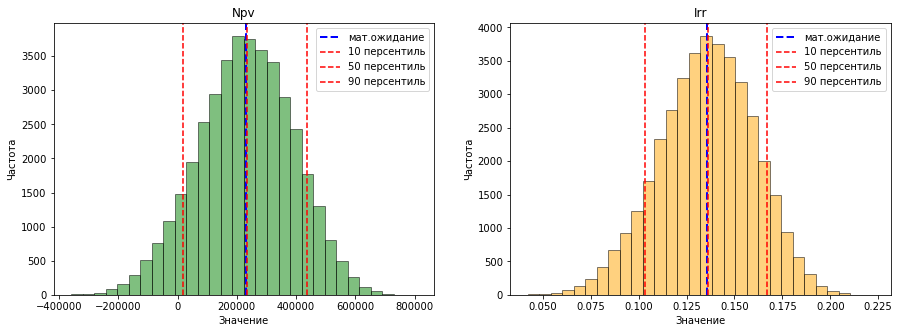

мат.ожидание npv: 230178.549087
мат.ожидание irr: 0.135467109016
npv перцентили {10: 19453.429842950201, 50: 233451.31725555297, 90: 435683.55371684907}
irr перцентили {10: 0.10305294161923473, 50: 0.13618165642077695, 90: 0.16673378216167242}


In [2]:
per=[10,50,90]
q_position_npv = { i:np.percentile(NPV, i) for i in  per}
q_position_irr = { i:np.percentile(IRR, i) for i in  per}
npv_mean=np.mean(NPV)
irr_mean=np.mean(IRR)


fig,ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Частота')
ax[0].hist(NPV, bins=30,color='green',alpha=0.5,edgecolor='black')
ax[0].set_title(r'Npv')
ax[0].axvline(npv_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_npv.keys():
    ax[0].axvline(x=q_position_npv[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[0].legend()


ax[1].set_xlabel('Значение')
ax[1].set_ylabel('Частота')
ax[1].hist(IRR, bins=30,color='orange',alpha=0.5,edgecolor='black')
ax[1].set_title("Irr")
ax[1].axvline(irr_mean,color='b',linewidth=2, linestyle='--',label='мат.ожидание')
for q in q_position_irr.keys():
    ax[1].axvline(x=q_position_irr[q], color='r', linestyle='--', label='%s персентиль'%q)
ax[1].legend()

plt.show()

print('мат.ожидание npv:',npv_mean)
print('мат.ожидание irr:',irr_mean)

print("npv перцентили",q_position_npv)
print("irr перцентили",q_position_irr)


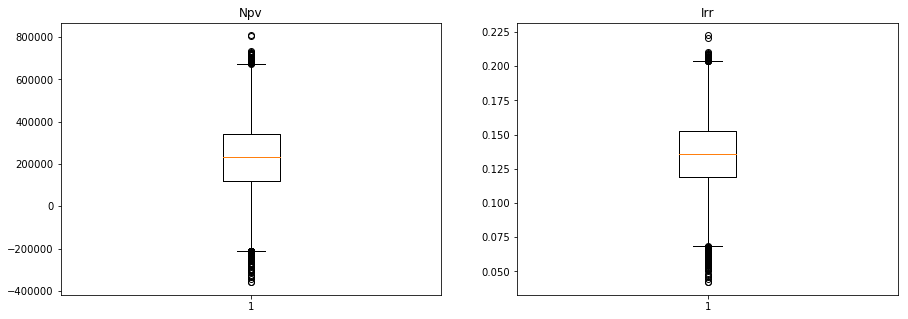

In [3]:
fig,bx = plt.subplots(1,2, figsize=(15,5))

bx[0].boxplot(NPV)
bx[0].set_title("Npv")
bx[1].boxplot(IRR)
bx[1].set_title("Irr")

plt.show()


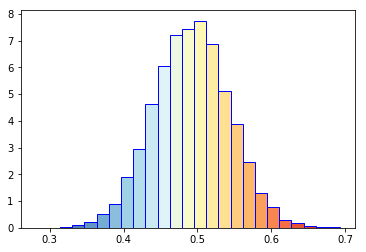

In [4]:
import numpy as n
import matplotlib.pyplot as plt

# Random gaussian data.
Ntotal = 10000
data = 0.05 * n.random.randn(Ntotal) + 0.5

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

# Get the histogramp
Y,X = n.histogram(data, 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0],edgecolor='blue')
plt.show()



In [5]:
years=["%s year"%v for v in range(1,4)]
years

['1 year', '2 year', '3 year']

In [6]:
years=["%s year"%v for v in range(1,4)]
price=[round(rnd.triangular(5.9,6.1,6),2),
           round(rnd.triangular(5.95,6.15,6.05),2),
           round(rnd.triangular(6.0,6.2,6.5),2)]
a=dict(zip(years,price))
a

{'1 year': 6.08, '2 year': 6.06, '3 year': 6.02}

In [7]:
price

[6.08, 6.06, 6.02]